In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [7]:
df["lunch"].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [8]:
df["parental level of education"].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
## defining the numerical and the categorical features
numeric_features=[i for i in df.columns if df[i].dtype !="object"]
categorical_features=[i for i in df.columns if df[i].dtype =="object"]

print("We have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features : {}".format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [13]:
## Adding the columns for the total score and the avergae 
df['Total_score']=df["math score"]+df["reading score"]+df["writing score"]
df["Avergae"]=round(df["Total_score"]/3,2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Avergae
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [22]:
reading_full=df[df["reading score"]==100]["gender"].count()
writing_full=df[df["writing score"]==100]["gender"].count()
math_full=df[df["math score"]==100]['gender'].count()

print(f"Number of students with full marks in Reading: {reading_full}")
print(f"Number of students with full marks in Writing: {writing_full}")
print(f"Number of students with full marks in Maths: {math_full}")


Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Maths: 7


In [23]:
reading_less20=df[df["reading score"]<=20]["gender"].count()
writing_less20=df[df["writing score"]<=20]["gender"].count()
math_less20=df[df["math score"]<=20]["gender"].count()
print(f"Number of students with less than 20 marks are : {reading_less20}")
print(f"Number of students with less than 20 marks are : {writing_less20}")
print(f"Number of students with less than 20 marks are : {math_less20}")

Number of students with less than 20 marks are : 1
Number of students with less than 20 marks are : 3
Number of students with less than 20 marks are : 4


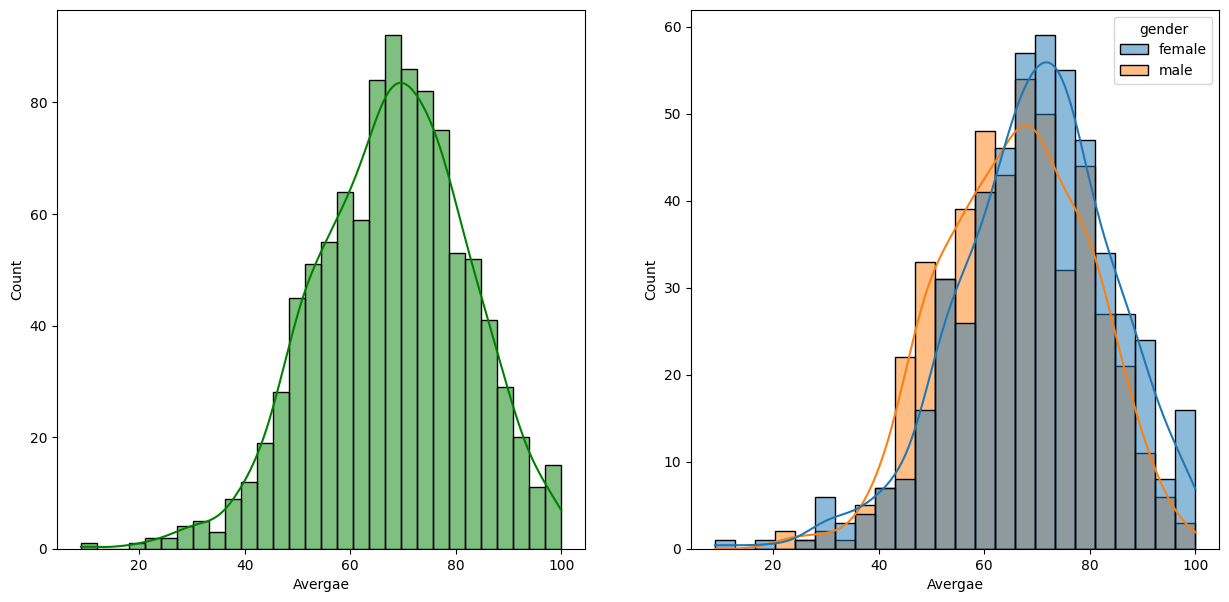

In [25]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Avergae',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Avergae',kde=True,hue='gender')
plt.show()